In [1]:
#!pip install pysimplegui
#pip install --force-reinstall -v "pyabf==2.3.8" #delite and reinstall the certain version
#pip install -Iv MySQL_python==1.2.2 # install the certain version
#!pip install matplotx==0.0.0

#import abf_explorer
#!pip install --upgrade numpy

#!pip install numpy 

import pyabf

import numpy as np

import matplotlib.pyplot as plt
#import matplotx

import statistics

from numpy.polynomial import Polynomial

import PySimpleGUI as sg

import pandas as pd

In [2]:
from pprint import pprint
#print = pprint 

my_file = pyabf.ABF("2023_08_03_0054.abf")
print(my_file)
#print(dir(my_file))
pprint(my_file.__dict__)
pprint(my_file.dataRate)


ABF (version 2.6.0.0) with 4 channels (mV, pA, mV, pA), sampled at 10.0 kHz, containing 14 sweeps, having no tags, with a total length of 0.75 minutes, recorded with protocol "double_cciv".
{'_adcSection': <pyabf.abfHeader.ADCSection object at 0x000001EBEC4E46D0>,
 '_cacheStimulusFiles': True,
 '_dacSection': <pyabf.abfHeader.DACSection object at 0x000001EBEC4E4610>,
 '_dataGain': [0.030517578807121044,
               0.6103515335098577,
               0.030517578807121044,
               0.6103515335098577],
 '_dataOffset': [0.0, 0.0, 0.0, 0.0],
 '_dtype': <class 'numpy.int16'>,
 '_epochPerDacSection': <pyabf.abfHeader.EpochPerDACSection object at 0x000001EBEC4E46A0>,
 '_epochSection': <pyabf.abfHeader.EpochSection object at 0x000001EBF741EEE0>,
 '_fileGUID': '033283D3-F505-4554-A64B-D3DA731484E1',
 '_fileSize': 3367424,
 '_headerV2': <pyabf.abfHeader.HeaderV2 object at 0x000001EBF257E040>,
 '_nDataFormat': 0,
 '_preLoadData': True,
 '_protocolSection': <pyabf.abfHeader.ProtocolSectio

In [3]:
# GUI to choose file
tres = 0
my_file = False
while True:
    event, values = sg.Window('Get filename example', [[sg.Text('Filename')], [sg.Input(), sg.FileBrowse()], [sg.OK(), sg.Cancel()] ]).read(close=True)
    if event == 'Cancel':
        break
    try:
        my_file = pyabf.ABF(values[0])
        break
    except:
        print('Incorrect file format')

In [15]:
#print(my_file) pprint(my_file.dict) pprint(my_file.dataRate)

# how many sweeps
print("Number of sweeps ", my_file.sweepList) 
print("Sampling rate ", my_file.dataRate)

sample_rate = int(my_file.dataRate)

if sample_rate == 20000:
    # Time for PreStim and Stim for Channel 0
    start10 = 0 
    end10 = 2800    
    start11 = 6000 
    end11 = 12800 
    # Time for PreStim and Stim for Channel 2
    start20 = 28000 
    end20 = 30800 
    start21 = 34000 
    end21 = 40800 
    # Rin calculation
    Rtime_ch0 = 8000 
    Rtime_ch2 = 36000 
elif sample_rate == 10000:
    # Time for PreStim and Stim for Channel 0
    start10 = 0 
    end10 = 1400     
    start11 = 3000 
    end11 = 6400 
    # Time for PreStim and Stim for Channel 2
    start20 = 14000
    end20 = 15400
    start21 = 16600
    end21 = 20000 
    # Rin calculation
    Rtime_ch0 = 4000
    Rtime_ch2 = 18000 
else:
    print("Check the Sampling rate!")

print(start11)

Number of sweeps  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Sampling rate  10000
3000


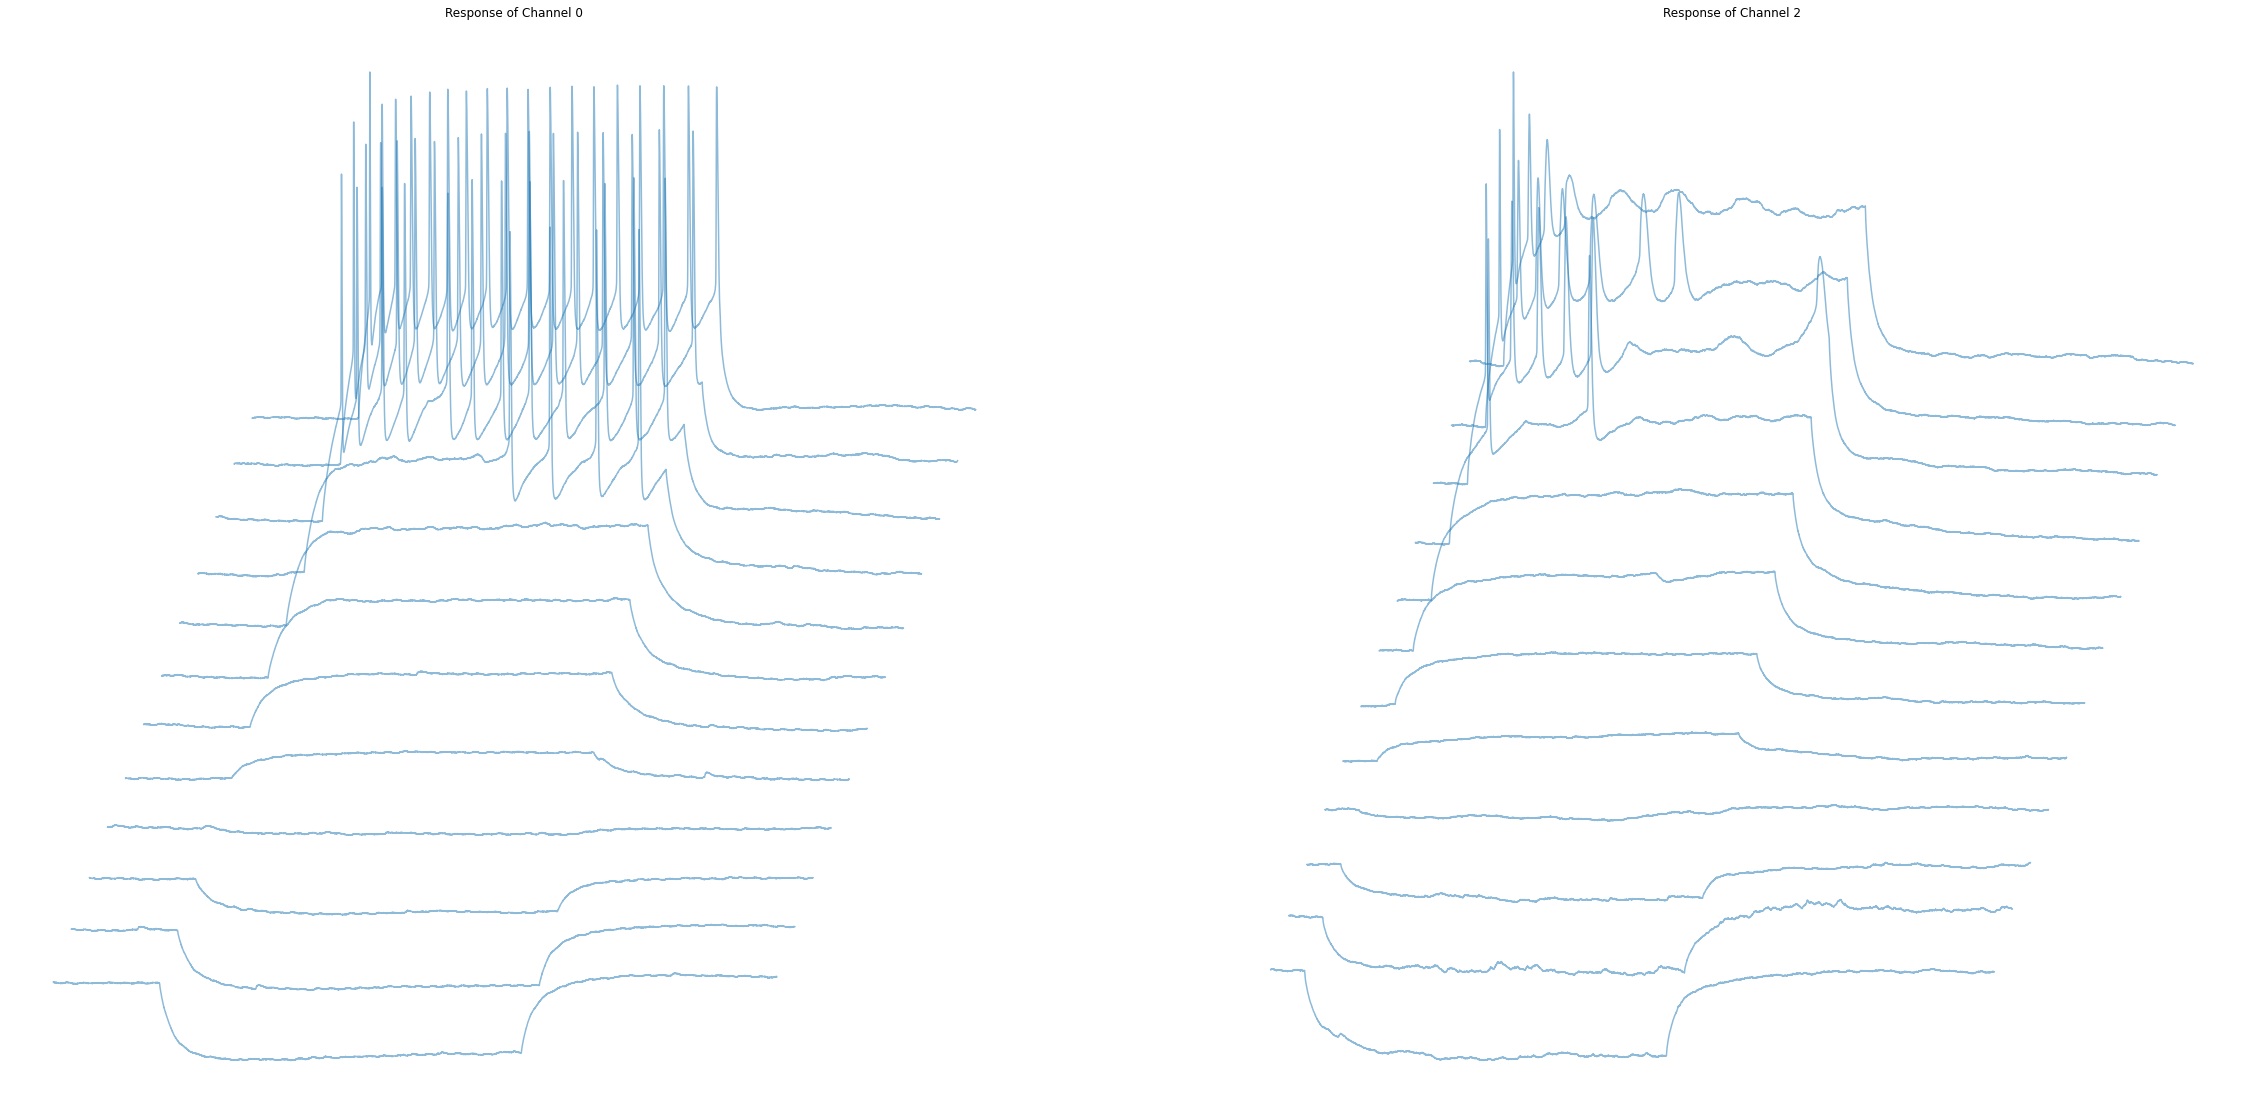

In [5]:
# Response of both cells both sweeps

plt.figure(figsize=(40,20))

plt.subplot (1,2,1)

for my_sweepNumber in my_file.sweepList:
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 0)
    i1, i2 = 0, int(my_file.dataRate * 1)  # plot part of the sweep
    dataX = my_file.sweepX[i1:i2] + .025 * my_sweepNumber
    dataY = my_file.sweepY[i1:i2] + 15 * my_sweepNumber
    plt.plot(dataX, dataY, color='C0', alpha=.5, label=my_sweepNumber)
#matplotx.line_labels()
plt.gca().axis('off')  # hide axes to enhance floating effect
plt.title("Response of Channel 0")

plt.subplot (1,2,2)

for my_sweepNumber in my_file.sweepList:
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 2)
    i1, i2 = 15000, int(my_file.dataRate * 2.5)  # plot part of the sweep #15000 in original for 10kHz sampling
    dataX = my_file.sweepX[i1:i2] + .025 * my_sweepNumber
    dataY = my_file.sweepY[i1:i2] + 15 * my_sweepNumber
    plt.plot(dataX, dataY, color='C0', alpha=.5, label=my_sweepNumber)
#matplotx.line_labels()
plt.gca().axis('off')  # hide axes to enhance floating effect
plt.title("Response of Channel 2")


plt.show()

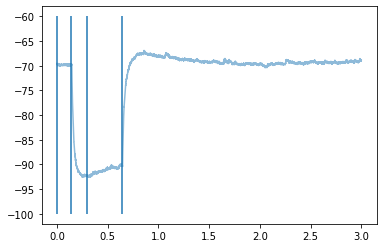

In [21]:
my_file.setSweep(sweepNumber = 0, channel = 0)
plt.plot(my_file.sweepX, my_file.sweepY, color='C0', alpha=.5, label=my_sweepNumber)
plt.vlines(start10/sample_rate, -100, -60)
plt.vlines(end10/sample_rate, -100, -60)
plt.vlines(start11/sample_rate, -100, -60)
plt.vlines(end11/sample_rate, -100, -60)

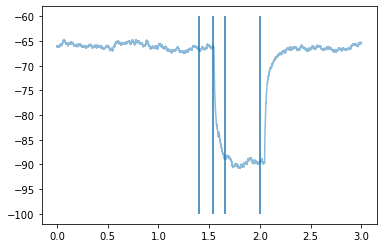

In [22]:
my_file.setSweep(sweepNumber = 0, channel = 2)
plt.plot(my_file.sweepX, my_file.sweepY, color='C0', alpha=.5, label=my_sweepNumber)
plt.vlines(start20/sample_rate, -100, -60)
plt.vlines(end20/sample_rate, -100, -60)
plt.vlines(start21/sample_rate, -100, -60)
plt.vlines(end21/sample_rate, -100, -60)

In [155]:
# Choose number of sweeps (based on plots) with no spikes

mysweeps_ch0 = int(input("Please enter your number of sweeps for 1st device: "))
mysweeps_ch2 = int(input("Please enter your number of sweeps for 2nd device: "))

Please enter your number of sweeps for 1st device: 10
Please enter your number of sweeps for 2nd device: 10


In [156]:
# Time for PreStim and Stim for Channel 0
#start10 = 0 # 0 for 10kHz 
#end10 = 2800 # 1400 for 10kHz 

#start11 = 6000 # 3000 for 10kHz 
#end11 = 12800 # 6400 for 10kHz 

# Time for PreStim and Stim for Channel 2

#start20 = 28000 # 14000 for 10kHz 
#end20 = 30800 # 15400 for 10kHz

#start21 = 33200 # 16600 for 10kHz
#end21 = 40000 # 20000 for 10kHz

# Choose number of sweeps (based on plots) with no spikes
# mysweeps_ch0 = 6
# mysweeps_ch2 = 9

#Calculation of CC for ch0->ch2 direction
deltaV_ch0_ch0ch2 = []
deltaV_ch2_ch0ch2 = []
deltaI_1 = []

for my_sweepNumber in range(mysweeps_ch0+1):
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 0)
    pre_stim = my_file.sweepY[start10:end10]
    post_stim = my_file.sweepY[start11:end11]
    deltaV_ch0_sweep = statistics.mean(pre_stim) - statistics.mean(post_stim)
    deltaV_ch0_ch0ch2.append(deltaV_ch0_sweep)
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 1)
    pre_stim_cur = my_file.sweepY[start10:end10]
    post_stim_cur = my_file.sweepY[start11:end11]
    deltaI_ch1_sweep = statistics.mean(pre_stim_cur) - statistics.mean(post_stim_cur)
    deltaI_1.append(deltaI_ch1_sweep)
deltaI_ch1 = [round(elem, 1) for elem in deltaI_1]

# print(deltaV_ch0)

for my_sweepNumber in range(mysweeps_ch0+1):
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 2)
    pre_stim = my_file.sweepY[start10:end10]
    post_stim = my_file.sweepY[start11:end11]
    deltaV_ch2_sweep = statistics.mean(pre_stim) - statistics.mean(post_stim)
    deltaV_ch2_ch0ch2.append(deltaV_ch2_sweep)

# print(deltaV_ch2)

CC_ch0ch2_draft = [x/y for x, y in zip (map(float, deltaV_ch2_ch0ch2), map(float, deltaV_ch0_ch0ch2))]
CC_ch0ch2 = [round(elem, 4) for elem in CC_ch0ch2_draft]
print('CC for ch0->ch2', CC_ch0ch2)
print('Current steps: ', deltaI_ch1)

#Calculation of CC for ch0->ch2 direction
deltaV_ch0_ch2ch0 = []
deltaV_ch2_ch2ch0 = []
deltaI_3 = []

for my_sweepNumber in range(mysweeps_ch2+1):
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 0)
    pre_stim = my_file.sweepY[start20:end20]
    post_stim = my_file.sweepY[start21:end21]
    deltaV_ch0_sweep = statistics.mean(pre_stim) - statistics.mean(post_stim)
    deltaV_ch0_ch2ch0.append(deltaV_ch0_sweep)
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 3)
    pre_stim_cur = my_file.sweepY[start20:end20]
    post_stim_cur = my_file.sweepY[start21:end21]
    deltaI_ch3_sweep = statistics.mean(pre_stim_cur) - statistics.mean(post_stim_cur)
    deltaI_3.append(deltaI_ch3_sweep)
deltaI_ch3 = [round(elem, 1) for elem in deltaI_3]

# print(deltaV_ch0)

for my_sweepNumber in range(mysweeps_ch2+1):
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 2)
    pre_stim = my_file.sweepY[start20:end20]
    post_stim = my_file.sweepY[start21:end21]
    deltaV_ch2_sweep = statistics.mean(pre_stim) - statistics.mean(post_stim)
    deltaV_ch2_ch2ch0.append(deltaV_ch2_sweep)

# print(deltaV_ch2)

CC_ch2ch0_draft = [x/y for x, y in zip (map(float, deltaV_ch0_ch2ch0), map(float, deltaV_ch2_ch2ch0))]
CC_ch2ch0 = [round(elem, 4) for elem in CC_ch2ch0_draft]
print('CC for ch2->ch0', CC_ch2ch0)
print('Current steps: ', deltaI_ch3)

CC for ch0->ch2 [0.063, 0.0529, 0.0568, 0.0316, 0.0524, 0.0458, 0.0501, 0.0469, 0.052, 0.054, 0.0531]
Current steps:  [101.0, 70.8, 40.1, 9.9, -20.8, -50.9, -80.8, -111.6, -141.6, -172.0, -202.8]
CC for ch2->ch0 [0.0317, 0.0156, -0.0093, 0.0591, 0.0429, 0.0529, 0.0336, 0.0481, 0.0433, 0.0477, 0.0458]
Current steps:  [100.2, 70.2, 40.1, 10.4, -20.0, -49.7, -80.1, -109.5, -139.9, -169.7, -200.0]


R2 channel 0 is  0.995
Rin channel 0 is  0.179

R2 channel 2 is  0.996
Rin channel 2 is  0.221


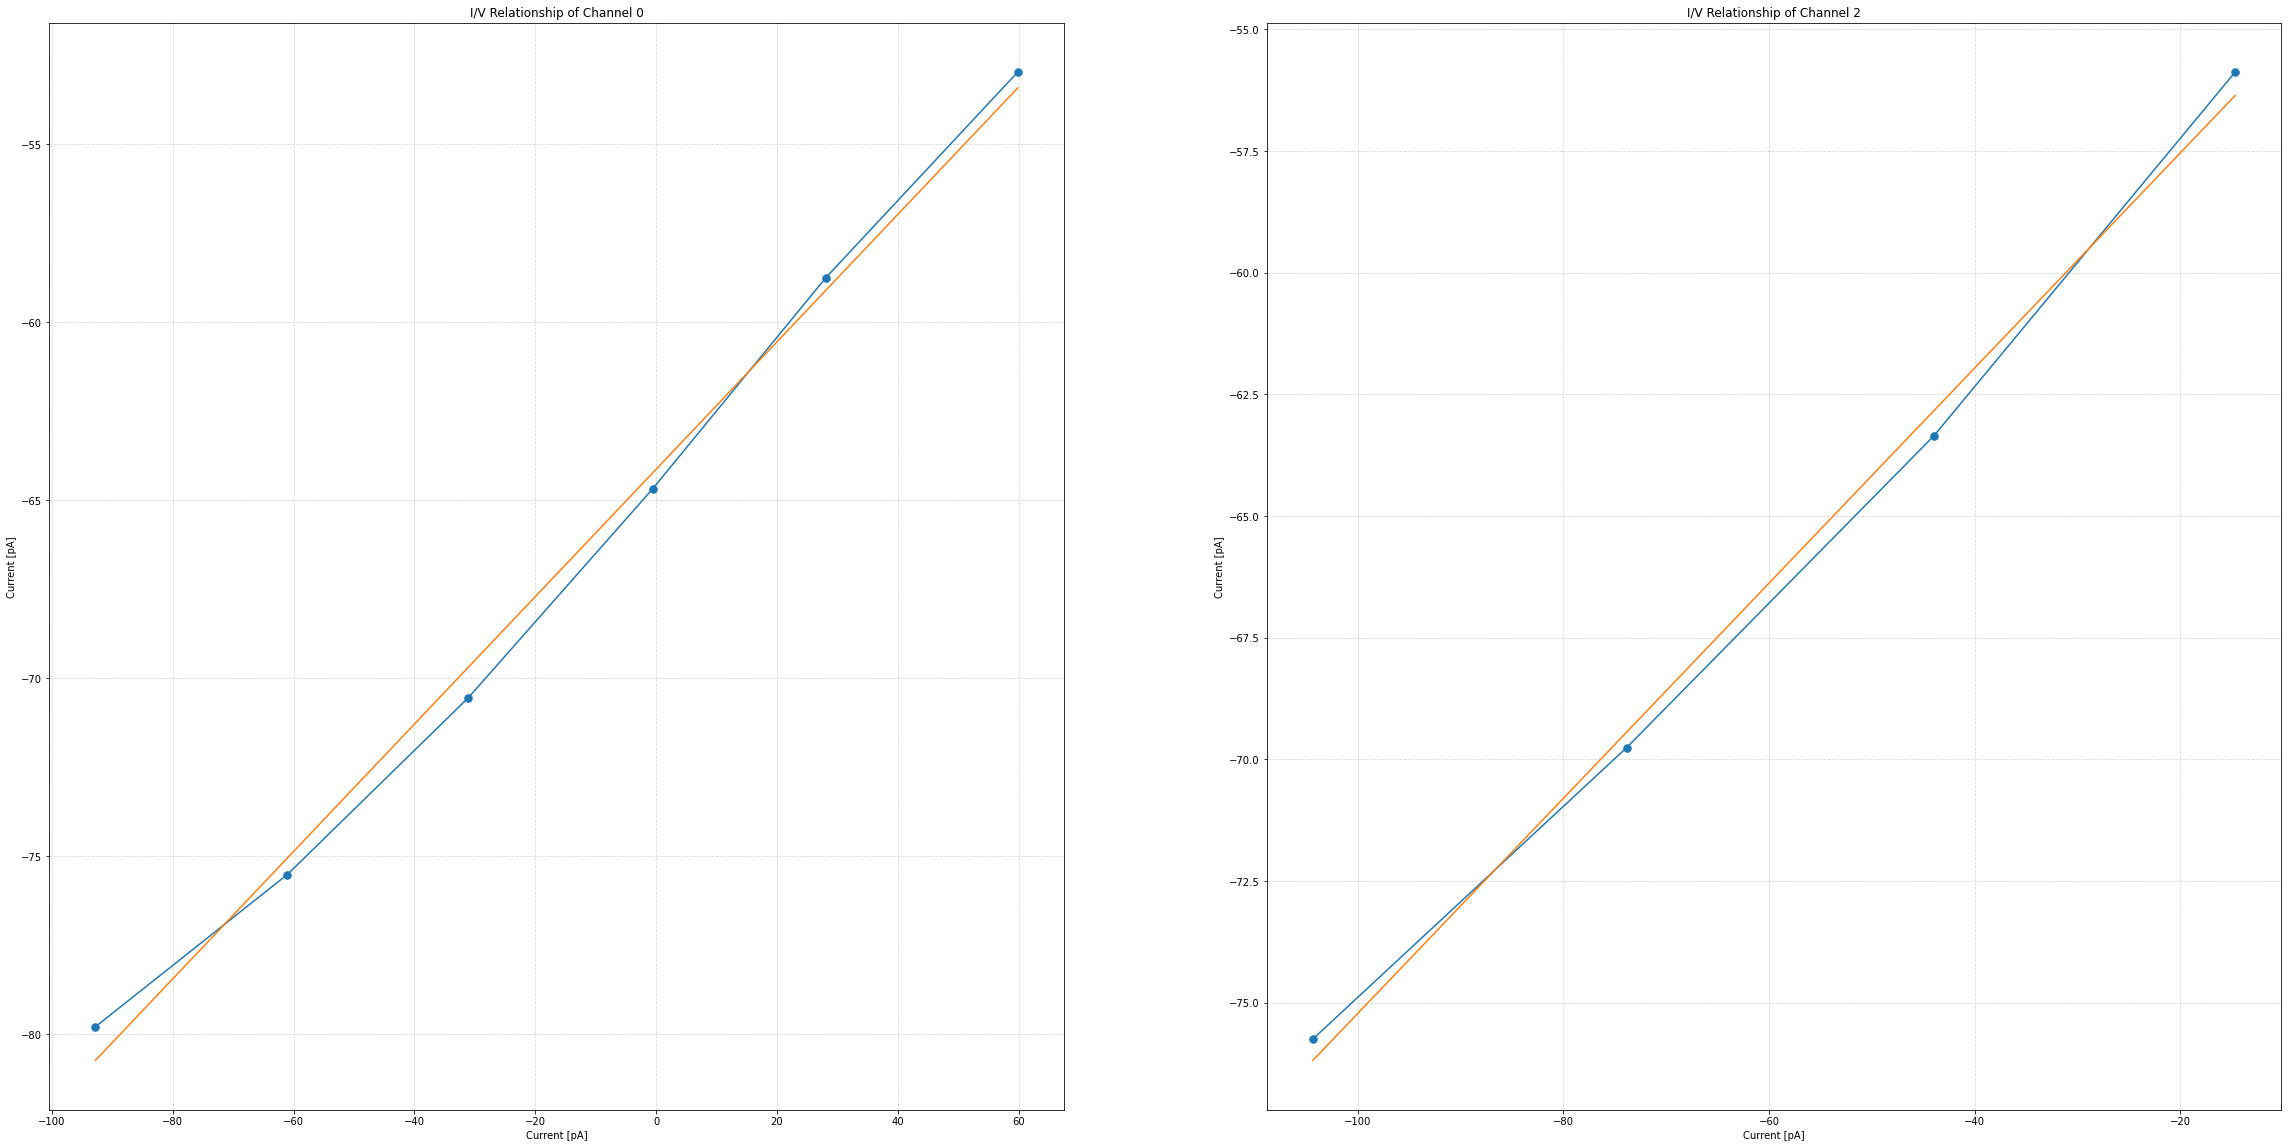

In [157]:
##### Rin calculation

#Rtime_ch0 = 8000 # 4000 for 10kHz
#Rtime_ch2 = 36000 # 18000 for 10kHz

currents_dev1 = []
voltages_dev1 = []

currents_dev2 = []
voltages_dev2 = []

x = []
x2 = []


#Rin channel 0
for my_sweepNumber in range(mysweeps_ch0+1):
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 0)
    if statistics.mean(my_file.sweepY[start11:end11]) > -80 and statistics.mean(my_file.sweepY[start11:end11]) < -50: 
        voltages_dev1.append(statistics.mean(my_file.sweepY[start11:end11])) 
        my_file.setSweep(sweepNumber = my_sweepNumber, channel = 1) 
        currents_dev1.append(my_file.sweepY[Rtime_ch0])

app_ch0 = np.polyfit(currents_dev1,voltages_dev1, 1, full=True)
my_SSE_ch0 = app_ch0[1][0]
diff_ch0 = voltages_dev1 - statistics.mean(voltages_dev1)
square_diff_ch0 = diff_ch0 ** 2
my_SST_ch0 = square_diff_ch0.sum()
R2_ch0 = 1 - my_SSE_ch0/my_SST_ch0 
print('R2 channel 0 is ', np.round(R2_ch0,3))

Rin_ch0 = np.round(app_ch0[0][0], 3)
Rin_ch0_list = [Rin_ch0, 'R^2 ch0', np.round(R2_ch0,3)]
print('Rin channel 0 is ', Rin_ch0)
print()

x = [np.round(app_ch0[0][0], 3)*y + np.round(app_ch0[0][1], 3) for y in currents_dev1]


#Rin channel 2
for my_sweepNumber in range(mysweeps_ch2+1):
    my_file.setSweep(sweepNumber = my_sweepNumber, channel = 2)
    if statistics.mean(my_file.sweepY[start21:end21]) > -80 and statistics.mean(my_file.sweepY[start21:end21]) < -50: 
        voltages_dev2.append(statistics.mean(my_file.sweepY[start21:end21])) 
        my_file.setSweep(sweepNumber = my_sweepNumber, channel = 3) 
        currents_dev2.append(my_file.sweepY[Rtime_ch2])

app_ch2 = np.polyfit(currents_dev2,voltages_dev2, 1, full=True)
my_SSE_ch2 = app_ch2[1][0]
diff_ch2 = voltages_dev2 - statistics.mean(voltages_dev2)
square_diff_ch2 = diff_ch2 ** 2
my_SST_ch2 = square_diff_ch2.sum()
R2_ch2 = 1 - my_SSE_ch2/my_SST_ch2 
print('R2 channel 2 is ', np.round(R2_ch2,3))

Rin_ch2 = np.round(app_ch2[0][0], 3)
Rin_ch2_list = [Rin_ch2, 'R^2 ch2', np.round(R2_ch2,3)]
print('Rin channel 2 is ', Rin_ch2)
x2 = [np.round(app_ch2[0][0], 3)*y + np.round(app_ch2[0][1], 3) for y in currents_dev2]


plt.figure(figsize=(40,20))

#plot Rin channel 0
plt.subplot (1,2,1)
plt.grid(alpha=.5, ls='--')
plt.plot(currents_dev1, voltages_dev1, '.-', ms=15)
plt.ylabel("Current [pA]")
plt.xlabel("Current [pA]")
plt.title("I/V Relationship of Channel 0")

plt.plot(currents_dev1, x, '-', ms=15)

#plot Rin channel 2
plt.subplot (1,2,2)
plt.grid(alpha=.5, ls='--')
plt.plot(currents_dev2, voltages_dev2, '.-', ms=15)
plt.ylabel("Current [pA]")
plt.xlabel("Current [pA]")
plt.title("I/V Relationship of Channel 2")

plt.plot(currents_dev2, x2, '-', ms=15)

plt.show()

In [158]:
col1 = 'CurStep Ch0'
col2 = 'CC Ch0Ch2'
col3 = 'Rin ch0'
col4 = 'CurStep Ch2'
col5 = 'CC Ch2Ch0'
col6 = 'Rin ch2'


def maximum(a, b):
     
    if a >= b:
        return a
    else:
        return b
     
row_length = maximum(mysweeps_ch0+1, mysweeps_ch2+1)

while len(CC_ch0ch2)<row_length: 
    CC_ch0ch2.append(None) 
    deltaI_ch1.append(None)
    
for i in range (len(Rin_ch0_list), row_length):
        Rin_ch0_list.append(None)

        
while len(CC_ch2ch0)<row_length: 
    CC_ch2ch0.append(None)  
    deltaI_ch3.append(None)
    
for i in range (len(Rin_ch2_list), row_length):
        Rin_ch2_list.append(None)
        
my_data = pd.DataFrame({col1:deltaI_ch1, 
                        col2:CC_ch0ch2, 
                        col3:Rin_ch0_list,
                        col4:deltaI_ch3, 
                        col5:CC_ch2ch0,
                        col6:Rin_ch2_list})

    
my_data.to_excel(r'C:\Users\user\Documents\IMBIT\Master\sample_data.xlsx', sheet_name='All data', index=False)